### Connect to google drive

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import pandas as pd
import numpy
import datetime as dt
import os
import matplotlib.pyplot as plt


In [4]:
work_path = '/content/gdrive/Shared drives/marketdata/stock/'
os.chdir(work_path)

In [16]:
os.listdir("./2020-09-21/6462")

['otc_lob_6462.csv', 'otc_tick_6462.csv']

### Define Parameters

In [5]:
date = "2020-09-21"

sid = "6462"
sid_type = "otc"

lob_path = os.path.join(work_path, date, sid, sid_type + "_lob_" + sid + ".csv")
tick_path = os.path.join(work_path, date, sid, sid_type + "_tick_" + sid + ".csv")

if not os.path.exists(lob_path):
    sid_type = "tse"
    lob_path = os.path.join(work_path, date, sid, sid_type + "_lob_" + sid + ".csv")
    tick_path = os.path.join(work_path, date, sid, sid_type + "_tick_" + sid + ".csv")

In [6]:
STOP_PROFIT = 1
STOP_LOSS = 2
TIME_OUT = 3

In [7]:
def numtotime(num):
    ms = num % 1000
    num //= 1000
    s = num % 100
    num //= 100
    mi = num % 100
    num //= 100
    h = num % 100
    num = num // 100
    # print(h, mi, s, ms)
    return dt.datetime(2020, 9, 21, h, mi, s, ms) # TODO

# Hft_strategy

In [18]:
class Hft_strategy:
    def __init__(self, lob_file, tick_file):
        self.lob_file = open(lob_file)
        self.tick_file = open(tick_file)
        self.lob_col = self.lob_file.readline()[:-1].split(",")
        self.tick_col = self.tick_file.readline()[:-1].split(",")
        self.ref_num = 0
        self.num_buy = 0
        self.num_sell = 0
        self.ask1_p = 0
        self.ask2_p = 0
        self.ask3_p = 0
        self.ask4_p = 0
        self.ask5_p = 0
        self.ask1_q = 0
        self.ask2_q = 0
        self.ask3_q = 0
        self.ask4_q = 0
        self.ask5_q = 0
        self.bid1_p = 0
        self.bid2_p = 0
        self.bid3_p = 0
        self.bid4_p = 0
        self.bid5_p = 0
        self.bid1_q = 0
        self.bid2_q = 0
        self.bid3_q = 0
        self.bid4_q = 0
        self.bid5_q = 0

        self.stop_profit = 0
        self.stop_loss = 0

        self.profit = 0
        self.cost = 0

        self.num_win = 0
        self.num_loss = 0

        self.order_time = 0
        self.stop_time = None

        self.position = 0
        self.current_time = 0

    def lob_update(self, lob_row):
        pass

    def tick_update(self, tick_row):
        pass

    def could_buy(self):
        pass

    def buy(self):
        pass

    def could_sell(self):
        pass

    def sell(self):
        pass
        
    def task(self):
        pass
    def show_result(self):
        pass

### Long (YY0)

In [ ]:
class YY0(Hft_strategy):
    def __init__(self, lob_file, tick_file, beta, time_out):
        super().__init__(lob_file, tick_file)
        self.tick_list = []
        self.beta = beta
        self.time_out = time_out
        self.order_p = 0

    def task(self):
        temp_lob = self.lob_file.readline()[:-1].split(",")
        temp_tick = self.tick_file.readline()[:-1].split(",")
        lob_row = pd.Series(data = temp_lob, index=self.lob_col)
        tick_row = pd.Series(data = temp_tick, index = self.tick_col)
        self.lob_datatype_conversion(lob_row)
        self.tick_datatype_conversion(tick_row)
        next_lob_time = lob_row['time']
        next_tick_time = tick_row['time']
        self.current_time = min(next_lob_time, next_tick_time)
        print(self.current_time)

        c = 0
        flag = 1
        while(self.current_time <= 132000000):
            # print(c)
            c += 1                        
            if (next_lob_time < next_tick_time):
                self.lob_update(lob_row)
                temp_lob = self.lob_file.readline()[:-1].split(",")
                lob_row = pd.Series(data = temp_lob, index=self.lob_col)
                self.lob_datatype_conversion(lob_row)
                next_lob_time = lob_row['time']
            else:
                self.tick_update(tick_row)
                temp_tick = self.tick_file.readline()[:-1].split(",")
                tick_row = pd.Series(data = temp_tick, index = self.tick_col)
                self.tick_datatype_conversion(tick_row)
                next_tick_time = tick_row['time']
            # print("next_lob: ", next_lob_time, "next_tick: ", next_tick_time)
            self.current_time = min(next_lob_time, next_tick_time)
            if self.could_buy():
                self.buy()
            sell_type = self.could_sell(tick_row)
            if sell_type == STOP_PROFIT:
                self.sell()
                print("get", self.order_p - self.cost)
                self.profit += self.order_p - self.cost
            elif sell_type == STOP_LOSS or sell_type == TIME_OUT:
                self.sell()
                print("get", self.bid1_p - self.cost)
                self.profit += self.bid1_p - self.cost

    
    def lob_datatype_conversion(self, lob_row):
        lob_row['time'] = int(lob_row['time'])
        lob_row['ask1_price'] = float(lob_row['ask1_price'])
        lob_row['ask2_price'] = float(lob_row['ask2_price'])
        lob_row['ask3_price'] = float(lob_row['ask3_price'])
        lob_row['ask4_price'] = float(lob_row['ask4_price'])
        lob_row['ask5_price'] = float(lob_row['ask5_price'])
        lob_row['bid1_price'] = float(lob_row['bid1_price'])
        lob_row['bid2_price'] = float(lob_row['bid2_price'])
        lob_row['bid3_price'] = float(lob_row['bid3_price'])
        lob_row['bid4_price'] = float(lob_row['bid4_price'])
        lob_row['bid5_price'] = float(lob_row['bid5_price'])
        lob_row['ask1_qty'] = int(lob_row['ask1_qty'])
        lob_row['ask2_qty'] = int(lob_row['ask2_qty'])
        lob_row['ask3_qty'] = int(lob_row['ask3_qty'])
        lob_row['ask4_qty'] = int(lob_row['ask4_qty'])
        lob_row['ask5_qty'] = int(lob_row['ask5_qty'])
        lob_row['bid1_qty'] = int(lob_row['bid1_qty'])
        lob_row['bid2_qty'] = int(lob_row['bid2_qty'])
        lob_row['bid3_qty'] = int(lob_row['bid3_qty'])
        lob_row['bid4_qty'] = int(lob_row['bid4_qty'])
        lob_row['bid5_qty'] = int(lob_row['bid5_qty'])

    def tick_datatype_conversion(self, tick_row):
        tick_row['time'] = int(tick_row['time'])
        tick_row['price'] = float(tick_row['price'])
        tick_row['qty'] = int(tick_row['qty'])

    def lob_update(self, lob_row):
        self.ask1_p = lob_row['ask1_price'] 
        self.ask2_p = lob_row['ask2_price']
        self.ask3_p = lob_row['ask3_price']
        self.ask4_p = lob_row['ask4_price']
        self.ask5_p = lob_row['ask5_price']
        self.ask1_q = lob_row['ask1_qty']
        self.ask2_q = lob_row['ask2_qty']
        self.ask3_q = lob_row['ask3_qty']
        self.ask4_q = lob_row['ask4_qty']
        self.ask5_q = lob_row['ask5_qty']
        self.bid1_p = lob_row['bid1_price']
        self.bid2_p = lob_row['bid2_price']
        self.bid3_p = lob_row['bid3_price']
        self.bid4_p = lob_row['bid4_price']
        self.bid5_p = lob_row['bid5_price']
        self.bid1_q = lob_row['bid1_qty']
        self.bid2_q = lob_row['bid2_qty']
        self.bid3_q = lob_row['bid3_qty']
        self.bid4_q = lob_row['bid4_qty']
        self.bid5_q = lob_row['bid5_qty']

    def tick_update(self, tick_row):
        
        if (tick_row['price'] >= self.ask1_p):
            tick_row['buy_or_sell'] = "buy"
            self.num_buy += tick_row['qty'] 
        elif (tick_row['price'] <= self.bid1_p):
            tick_row['buy_or_sell'] = "sell"
            self.num_sell += tick_row['qty']
        else:
            tick_row['buy_or_sell'] = "QAO"
            print("------Weird price!!!!!---------")
            print("At time: ", tick_row['time'])
            print("tick_row_price", tick_row['price'])
            print("ask_1_p", self.ask1_p)
            print("bid_1_p", self.bid1_p)
            # assert(0), "Weird price!!!!!"

        if len(self.tick_list) < 30:
            self.tick_list.append(tick_row)
        else:
            if self.tick_list[0]['buy_or_sell'] == "buy":
                self.num_buy -= self.tick_list[0]['qty']
            elif self.tick_list[0]['buy_or_sell'] == "sell":
                self.num_sell -= self.tick_list[0]['qty']
            else:
                pass
            self.tick_list.pop(0)
            self.tick_list.append(tick_row)

    def could_buy(self):
        if self.position == 0 and self.num_buy > self.num_sell * self.beta and self.current_time > 90100000:
            return True
        else:
            return False

    def buy(self):
        print(self.current_time, "buy price at ", self.ask1_p)
        self.position = 1
        self.order_time = self.current_time
        self.cost = self.ask1_p
        self.order_p = self.ask3_p

    def could_sell(self, tick_row):
        # stop profit
        if self.position != 0 and tick_row['price'] > self.order_p:
            print("stop profit")
            return STOP_PROFIT
        # stop loss
        elif self.position != 0 and tick_row['price'] <= self.cost * 0.99:
            print("stop loss")
            return STOP_LOSS
        # time out
        elif self.position != 0 and self.current_time - self.order_time >= self.time_out:
            print("time out")
            return TIME_OUT
        else:
            return False
        # keep position

        # no position

    def sell(self):
        self.position = 0
        # self.order_time = self.current_time
        

            

    def show_result(self):
        print("----------Result Report--------------")
        print("profit: ", self.profit)




In [ ]:
temp = YY0(lob_path, tick_path, 20, 300000)
temp.task()
temp.show_result()

90000651
90316868 buy price at  443.5
------Weird price!!!!!---------
At time:  90328093
tick_row_price 443.5
ask_1_p 444.0
bid_1_p 443.0
stop profit
get 1.0
90541180 buy price at  445.0
time out
get 0.0
91110609 buy price at  446.0
time out
get 0.5
91602950 buy price at  447.0
time out
get 0.0
92115150 buy price at  447.5
time out
get 0.5
92508092 buy price at  448.0
time out
get 0.5
93038336 buy price at  449.5
time out
get -0.5
95410241 buy price at  447.0
time out
get -0.5
105026124 buy price at  443.5
time out
get 0.0
111214468 buy price at  443.0
time out
get 0.0
113807084 buy price at  443.0
time out
get -0.5
114111556 buy price at  443.0
time out
get -0.5
115342705 buy price at  442.5
time out
get 0.0
115739433 buy price at  443.0
time out
get 0.0
124705832 buy price at  442.0
time out
get 0.0
125730285 buy price at  442.0
time out
get -0.5
----------Result Report--------------
profit:  0.0


### Short (YY1)

In [ ]:
class YY1(Hft_strategy):
    def __init__(self, lob_file, tick_file, beta, time_out):
        super().__init__(lob_file, tick_file)
        self.tick_list = []
        self.beta = beta
        self.time_out = time_out
        self.order_p = 0

    def task(self):
        temp_lob = self.lob_file.readline()[:-1].split(",")
        temp_tick = self.tick_file.readline()[:-1].split(",")
        lob_row = pd.Series(data = temp_lob, index=self.lob_col)
        tick_row = pd.Series(data = temp_tick, index = self.tick_col)
        self.lob_datatype_conversion(lob_row)
        self.tick_datatype_conversion(tick_row)
        next_lob_time = lob_row['time']
        next_tick_time = tick_row['time']
        self.current_time = min(next_lob_time, next_tick_time)
        print(self.current_time)

        c = 0
        flag = 1
        while(self.current_time <= 132000000):
            # print(c)
            c += 1                        
            if (next_lob_time < next_tick_time):
                self.lob_update(lob_row)
                temp_lob = self.lob_file.readline()[:-1].split(",")
                lob_row = pd.Series(data = temp_lob, index=self.lob_col)
                self.lob_datatype_conversion(lob_row)
                next_lob_time = lob_row['time']
            else:
                self.tick_update(tick_row)
                temp_tick = self.tick_file.readline()[:-1].split(",")
                tick_row = pd.Series(data = temp_tick, index = self.tick_col)
                self.tick_datatype_conversion(tick_row)
                next_tick_time = tick_row['time']
            # print("next_lob: ", next_lob_time, "next_tick: ", next_tick_time)
            self.current_time = min(next_lob_time, next_tick_time)
            if self.could_sell():
                self.sell()
            buy_type = self.could_buy(tick_row)
            if buy_type == STOP_PROFIT:
                self.buy()
                print("get", -self.order_p + self.cost)
                self.profit += self.cost - self.order_p 
            elif buy_type == STOP_LOSS or buy_type == TIME_OUT:
                self.buy()
                print("get", -self.ask1_p + self.cost)
                self.profit += -self.ask1_p + self.cost

    
    def lob_datatype_conversion(self, lob_row):
        lob_row['time'] = int(lob_row['time'])
        lob_row['ask1_price'] = float(lob_row['ask1_price'])
        lob_row['ask2_price'] = float(lob_row['ask2_price'])
        lob_row['ask3_price'] = float(lob_row['ask3_price'])
        lob_row['ask4_price'] = float(lob_row['ask4_price'])
        lob_row['ask5_price'] = float(lob_row['ask5_price'])
        lob_row['bid1_price'] = float(lob_row['bid1_price'])
        lob_row['bid2_price'] = float(lob_row['bid2_price'])
        lob_row['bid3_price'] = float(lob_row['bid3_price'])
        lob_row['bid4_price'] = float(lob_row['bid4_price'])
        lob_row['bid5_price'] = float(lob_row['bid5_price'])
        lob_row['ask1_qty'] = int(lob_row['ask1_qty'])
        lob_row['ask2_qty'] = int(lob_row['ask2_qty'])
        lob_row['ask3_qty'] = int(lob_row['ask3_qty'])
        lob_row['ask4_qty'] = int(lob_row['ask4_qty'])
        lob_row['ask5_qty'] = int(lob_row['ask5_qty'])
        lob_row['bid1_qty'] = int(lob_row['bid1_qty'])
        lob_row['bid2_qty'] = int(lob_row['bid2_qty'])
        lob_row['bid3_qty'] = int(lob_row['bid3_qty'])
        lob_row['bid4_qty'] = int(lob_row['bid4_qty'])
        lob_row['bid5_qty'] = int(lob_row['bid5_qty'])

    def tick_datatype_conversion(self, tick_row):
        tick_row['time'] = int(tick_row['time'])
        tick_row['price'] = float(tick_row['price'])
        tick_row['qty'] = int(tick_row['qty'])

    def lob_update(self, lob_row):
        self.ask1_p = lob_row['ask1_price'] 
        self.ask2_p = lob_row['ask2_price']
        self.ask3_p = lob_row['ask3_price']
        self.ask4_p = lob_row['ask4_price']
        self.ask5_p = lob_row['ask5_price']
        self.ask1_q = lob_row['ask1_qty']
        self.ask2_q = lob_row['ask2_qty']
        self.ask3_q = lob_row['ask3_qty']
        self.ask4_q = lob_row['ask4_qty']
        self.ask5_q = lob_row['ask5_qty']
        self.bid1_p = lob_row['bid1_price']
        self.bid2_p = lob_row['bid2_price']
        self.bid3_p = lob_row['bid3_price']
        self.bid4_p = lob_row['bid4_price']
        self.bid5_p = lob_row['bid5_price']
        self.bid1_q = lob_row['bid1_qty']
        self.bid2_q = lob_row['bid2_qty']
        self.bid3_q = lob_row['bid3_qty']
        self.bid4_q = lob_row['bid4_qty']
        self.bid5_q = lob_row['bid5_qty']

    def tick_update(self, tick_row):
        
        if (tick_row['price'] >= self.ask1_p):
            tick_row['buy_or_sell'] = "buy"
            self.num_buy += tick_row['qty'] 
        elif (tick_row['price'] <= self.bid1_p):
            tick_row['buy_or_sell'] = "sell"
            self.num_sell += tick_row['qty']
        else:
            tick_row['buy_or_sell'] = "QAO"
            print("------Weird price!!!!!---------")
            print("At time: ", tick_row['time'])
            print("tick_row_price", tick_row['price'])
            print("ask_1_p", self.ask1_p)
            print("bid_1_p", self.bid1_p)
            # assert(0), "Weird price!!!!!"

        if len(self.tick_list) < 30:
            self.tick_list.append(tick_row)
        else:
            if self.tick_list[0]['buy_or_sell'] == "buy":
                self.num_buy -= self.tick_list[0]['qty']
            elif self.tick_list[0]['buy_or_sell'] == "sell":
                self.num_sell -= self.tick_list[0]['qty']
            else:
                pass
            self.tick_list.pop(0)
            self.tick_list.append(tick_row)

    def could_sell(self):
        if self.position == 0 and self.num_sell > self.num_buy * self.beta and self.current_time > 90100000:
            print("# sell: ", self.num_sell, "  # buy: ", self.num_buy)
            print("bid1_q: ", self.bid1_q, "  bid2_q: ", self.bid2_q)
            return True
        else:
            return False

    def sell(self):
        print(self.current_time, "sell price at ", self.bid1_p)
        self.position = 1
        self.order_time = self.current_time
        self.cost = self.bid1_p
        self.order_p = self.bid2_p

    def could_buy(self, tick_row):
        # stop profit
        if self.position != 0 and tick_row['price'] < self.order_p:
            print("stop profit")
            return STOP_PROFIT
        # stop loss
        elif self.position != 0 and tick_row['price'] >= self.cost * 1.01:
            print("stop loss")
            return STOP_LOSS
        # time out
        elif self.position != 0 and self.current_time - self.order_time >= self.time_out:
            print("time out")
            return TIME_OUT
        else:
            return False
        # keep position

        # no position

    def buy(self):
        self.position = 0
        # self.order_time = self.current_time
        

            

    def show_result(self):
        print("----------Result Report--------------")
        print("profit: ", self.profit)




In [ ]:
temp1 = YY1(lob_path, tick_path, 5, 300000)
temp1.task()
temp1.show_result()

90005977
------Weird price!!!!!---------
At time:  90459617
tick_row_price 619.0
ask_1_p 620.0
bid_1_p 618.0
# sell:  29   # buy:  5
bid1_q:  9   bid2_q:  32
91836594 sell price at  625.0
stop profit
get 1.0
# sell:  39   # buy:  7
bid1_q:  17   bid2_q:  15
93328939 sell price at  626.0
stop profit
get 1.0
# sell:  45   # buy:  6
bid1_q:  26   bid2_q:  41
94157578 sell price at  623.0
stop profit
get 1.0
# sell:  74   # buy:  1
bid1_q:  49   bid2_q:  83
94238873 sell price at  621.0
time out
get -2.0
# sell:  32   # buy:  6
bid1_q:  13   bid2_q:  14
95041313 sell price at  623.0
stop profit
get 1.0
# sell:  37   # buy:  7
bid1_q:  57   bid2_q:  80
95214685 sell price at  621.0
time out
get -1.0
# sell:  34   # buy:  6
bid1_q:  16   bid2_q:  87
104144953 sell price at  621.0
stop profit
get 1.0
# sell:  65   # buy:  3
bid1_q:  54   bid2_q:  62
104332226 sell price at  619.0
time out
get -1.0
# sell:  42   # buy:  8
bid1_q:  12   bid2_q:  64
104727749 sell price at  619.0
time out
get -1

### Short (YY2) 
--> consider Bid1_q + Bid2_q

In [19]:
class YY2(Hft_strategy):
    def __init__(self, lob_file, tick_file, beta, time_out, gamma):
        super().__init__(lob_file, tick_file)
        self.tick_list = []
        self.beta = beta
        self.time_out = time_out
        self.order_p = 0
        self.gamma = gamma
        self.in_history = []
        self.out_history = []
        self.in_time = []
        self.out_time = []

    def task(self):
        temp_lob = self.lob_file.readline()[:-1].split(",")
        temp_tick = self.tick_file.readline()[:-1].split(",")
        lob_row = pd.Series(data = temp_lob, index=self.lob_col)
        tick_row = pd.Series(data = temp_tick, index = self.tick_col)
        self.lob_datatype_conversion(lob_row)
        self.tick_datatype_conversion(tick_row)
        next_lob_time = lob_row['time']
        next_tick_time = tick_row['time']
        self.current_time = min(next_lob_time, next_tick_time)
        print(self.current_time)

        c = 0
        flag = 1
        while(self.current_time <= 132000000):
            # print(c)
            c += 1                        
            if (next_lob_time < next_tick_time):
                self.lob_update(lob_row)
                temp_lob = self.lob_file.readline()[:-1].split(",")
                lob_row = pd.Series(data = temp_lob, index=self.lob_col)
                self.lob_datatype_conversion(lob_row)
                next_lob_time = lob_row['time']
            else:
                self.tick_update(tick_row)
                temp_tick = self.tick_file.readline()[:-1].split(",")
                tick_row = pd.Series(data = temp_tick, index = self.tick_col)
                self.tick_datatype_conversion(tick_row)
                next_tick_time = tick_row['time']
            # print("next_lob: ", next_lob_time, "next_tick: ", next_tick_time)
            self.current_time = min(next_lob_time, next_tick_time)
            if self.could_sell():
                self.sell()
            buy_type = self.could_buy(tick_row)
            if buy_type == STOP_PROFIT:
                self.buy()
                print("出場時間：", self.current_time)
                self.out_time.append(self.current_time)
                print("get", -self.order_p + self.cost)
                self.out_history.append(self.order_p)
                self.profit += self.cost - self.order_p 
                print("-"*30)
            elif buy_type == STOP_LOSS or buy_type == TIME_OUT:
                self.buy()
                print("出場時間：", self.current_time)
                self.out_time.append(self.current_time)
                print("get", -self.ask1_p + self.cost)
                self.out_history.append(self.ask1_p)
                self.profit += -self.ask1_p + self.cost
                print("-"*30)

    
    def lob_datatype_conversion(self, lob_row):
        lob_row['time'] = int(lob_row['time'])
        lob_row['ask1_price'] = float(lob_row['ask1_price'])
        lob_row['ask2_price'] = float(lob_row['ask2_price'])
        lob_row['ask3_price'] = float(lob_row['ask3_price'])
        lob_row['ask4_price'] = float(lob_row['ask4_price'])
        lob_row['ask5_price'] = float(lob_row['ask5_price'])
        lob_row['bid1_price'] = float(lob_row['bid1_price'])
        lob_row['bid2_price'] = float(lob_row['bid2_price'])
        lob_row['bid3_price'] = float(lob_row['bid3_price'])
        lob_row['bid4_price'] = float(lob_row['bid4_price'])
        lob_row['bid5_price'] = float(lob_row['bid5_price'])
        lob_row['ask1_qty'] = int(lob_row['ask1_qty'])
        lob_row['ask2_qty'] = int(lob_row['ask2_qty'])
        lob_row['ask3_qty'] = int(lob_row['ask3_qty'])
        lob_row['ask4_qty'] = int(lob_row['ask4_qty'])
        lob_row['ask5_qty'] = int(lob_row['ask5_qty'])
        lob_row['bid1_qty'] = int(lob_row['bid1_qty'])
        lob_row['bid2_qty'] = int(lob_row['bid2_qty'])
        lob_row['bid3_qty'] = int(lob_row['bid3_qty'])
        lob_row['bid4_qty'] = int(lob_row['bid4_qty'])
        lob_row['bid5_qty'] = int(lob_row['bid5_qty'])

    def tick_datatype_conversion(self, tick_row):
        tick_row['time'] = int(tick_row['time'])
        tick_row['price'] = float(tick_row['price'])
        tick_row['qty'] = int(tick_row['qty'])

    def lob_update(self, lob_row):
        self.ask1_p = lob_row['ask1_price'] 
        self.ask2_p = lob_row['ask2_price']
        self.ask3_p = lob_row['ask3_price']
        self.ask4_p = lob_row['ask4_price']
        self.ask5_p = lob_row['ask5_price']
        self.ask1_q = lob_row['ask1_qty']
        self.ask2_q = lob_row['ask2_qty']
        self.ask3_q = lob_row['ask3_qty']
        self.ask4_q = lob_row['ask4_qty']
        self.ask5_q = lob_row['ask5_qty']
        self.bid1_p = lob_row['bid1_price']
        self.bid2_p = lob_row['bid2_price']
        self.bid3_p = lob_row['bid3_price']
        self.bid4_p = lob_row['bid4_price']
        self.bid5_p = lob_row['bid5_price']
        self.bid1_q = lob_row['bid1_qty']
        self.bid2_q = lob_row['bid2_qty']
        self.bid3_q = lob_row['bid3_qty']
        self.bid4_q = lob_row['bid4_qty']
        self.bid5_q = lob_row['bid5_qty']

    def tick_update(self, tick_row):
        
        if (tick_row['price'] >= self.ask1_p):
            tick_row['buy_or_sell'] = "buy"
            self.num_buy += tick_row['qty'] 
        elif (tick_row['price'] <= self.bid1_p):
            tick_row['buy_or_sell'] = "sell"
            self.num_sell += tick_row['qty']
        else:
            tick_row['buy_or_sell'] = "QAO"
            print("------Weird price!!!!!---------")
            print("At time: ", tick_row['time'])
            print("tick_row_price", tick_row['price'])
            print("ask_1_p", self.ask1_p)
            print("bid_1_p", self.bid1_p)
            # assert(0), "Weird price!!!!!"

        if len(self.tick_list) < 30:
            self.tick_list.append(tick_row)
        else:
            if self.tick_list[0]['buy_or_sell'] == "buy":
                self.num_buy -= self.tick_list[0]['qty']
            elif self.tick_list[0]['buy_or_sell'] == "sell":
                self.num_sell -= self.tick_list[0]['qty']
            else:
                pass
            self.tick_list.pop(0)
            self.tick_list.append(tick_row)

    def could_sell(self):
        if self.position == 0 and self.num_sell > self.num_buy * self.beta and self.current_time > 90100000 \
        and self.num_sell > self.gamma * (self.bid1_q + self.bid2_q):
            print("# sell: ", self.num_sell, "  # buy: ", self.num_buy)
            print("bid1_q: ", self.bid1_q, "  bid2_q: ", self.bid2_q)
            return True
        else:
            return False

    def sell(self):
        print("進場時間：", self.current_time, "\n  sell price at ", self.bid1_p)
        self.in_history.append(self.bid1_p)
        self.in_time.append(self.current_time)
        self.position = 1
        self.order_time = self.current_time
        self.cost = self.bid1_p
        self.order_p = self.bid2_p

    def could_buy(self, tick_row):
        # stop profit
        if self.position != 0 and tick_row['price'] < self.order_p:
            print("stop profit")
            return STOP_PROFIT
        # stop loss
        elif self.position != 0 and tick_row['price'] >= self.cost * 1.005:
            print("stop loss")
            return STOP_LOSS
        # time out
        elif self.position != 0 and self.current_time - self.order_time >= self.time_out:
            print("time out")
            return TIME_OUT
        else:
            return False
        # keep position

        # no position

    def buy(self):
        self.position = 0
        # self.order_time = self.current_time
        

            

    def show_result(self):
        print("----------Result Report--------------")
        print("profit: ", self.profit)
        plt.figure(figsize=(20,10))
        plt.scatter([numtotime(x) for x in self.in_time], self.in_history, marker='o')
        plt.scatter([numtotime(x) for x in self.out_time], self.out_history, marker='x')
        plt.show()



In [ ]:
temp2 = YY2(lob_path, tick_path, 5, 1000000, 0.8)
temp2.task()
temp2.show_result()

# YY3
with cooldown


In [47]:
class YY3(Hft_strategy):
    def __init__(self, lob_file, tick_file, beta, time_out, gamma, cool_down_min):
        super().__init__(lob_file, tick_file)
        self.tick_list = []
        self.beta = beta
        self.time_out = time_out
        self.order_p = 0
        self.gamma = gamma
        self.in_history = []
        self.out_history = []
        self.in_time = []
        self.out_time = []
        self.cool_down_min = cool_down_min
        print(self.lob_file)
        print(self.tick_file)
    def task(self):
        temp_lob = self.lob_file.readline()[:-1].split(",")
        temp_tick = self.tick_file.readline()[:-1].split(",")
        lob_row = pd.Series(data = temp_lob, index=self.lob_col)
        tick_row = pd.Series(data = temp_tick, index = self.tick_col)
        self.lob_datatype_conversion(lob_row)
        self.tick_datatype_conversion(tick_row)
        next_lob_time = lob_row['time']
        next_tick_time = tick_row['time']
        self.current_time = min(next_lob_time, next_tick_time)
        print(self.current_time)

        c = 0
        flag = 1
        while(self.current_time <= 132000000):
            # print(c)
            c += 1                        
            if (next_lob_time < next_tick_time):
                self.lob_update(lob_row)
                temp_lob = self.lob_file.readline()[:-1].split(",")
                lob_row = pd.Series(data = temp_lob, index=self.lob_col)
                self.lob_datatype_conversion(lob_row)
                next_lob_time = lob_row['time']
            else:
                self.tick_update(tick_row)
                temp_tick = self.tick_file.readline()[:-1].split(",")
                tick_row = pd.Series(data = temp_tick, index = self.tick_col)
                self.tick_datatype_conversion(tick_row)
                next_tick_time = tick_row['time']
            # print("next_lob: ", next_lob_time, "next_tick: ", next_tick_time)
            self.current_time = min(next_lob_time, next_tick_time)
            if self.could_sell():
                self.sell()
            buy_type = self.could_buy(tick_row)
            if buy_type == STOP_PROFIT:
                self.buy()
                print("出場時間：", self.current_time)
                self.out_time.append(self.current_time)
                print("buy at", self.order_p)
                print("get", -self.order_p + self.cost)
                self.out_history.append(self.order_p)
                self.profit += self.cost - self.order_p 
                print("-"*30)
            elif buy_type == STOP_LOSS or buy_type == TIME_OUT:
                self.buy()
                print("出場時間：", self.current_time)
                self.out_time.append(self.current_time)
                print("buy at", self.ask1_p)
                print("get", -self.ask1_p + self.cost)
                self.out_history.append(self.ask1_p)
                self.profit += -self.ask1_p + self.cost
                print("-"*30)

    
    def lob_datatype_conversion(self, lob_row):
        lob_row['time'] = int(lob_row['time'])
        lob_row['ask1_price'] = float(lob_row['ask1_price'])
        lob_row['ask2_price'] = float(lob_row['ask2_price'])
        lob_row['ask3_price'] = float(lob_row['ask3_price'])
        lob_row['ask4_price'] = float(lob_row['ask4_price'])
        lob_row['ask5_price'] = float(lob_row['ask5_price'])
        lob_row['bid1_price'] = float(lob_row['bid1_price'])
        lob_row['bid2_price'] = float(lob_row['bid2_price'])
        lob_row['bid3_price'] = float(lob_row['bid3_price'])
        lob_row['bid4_price'] = float(lob_row['bid4_price'])
        lob_row['bid5_price'] = float(lob_row['bid5_price'])
        lob_row['ask1_qty'] = int(lob_row['ask1_qty'])
        lob_row['ask2_qty'] = int(lob_row['ask2_qty'])
        lob_row['ask3_qty'] = int(lob_row['ask3_qty'])
        lob_row['ask4_qty'] = int(lob_row['ask4_qty'])
        lob_row['ask5_qty'] = int(lob_row['ask5_qty'])
        lob_row['bid1_qty'] = int(lob_row['bid1_qty'])
        lob_row['bid2_qty'] = int(lob_row['bid2_qty'])
        lob_row['bid3_qty'] = int(lob_row['bid3_qty'])
        lob_row['bid4_qty'] = int(lob_row['bid4_qty'])
        lob_row['bid5_qty'] = int(lob_row['bid5_qty'])

    def tick_datatype_conversion(self, tick_row):
        tick_row['time'] = int(tick_row['time'])
        tick_row['price'] = float(tick_row['price'])
        tick_row['qty'] = int(tick_row['qty'])

    def lob_update(self, lob_row):
        self.ask1_p = lob_row['ask1_price'] 
        self.ask2_p = lob_row['ask2_price']
        self.ask3_p = lob_row['ask3_price']
        self.ask4_p = lob_row['ask4_price']
        self.ask5_p = lob_row['ask5_price']
        self.ask1_q = lob_row['ask1_qty']
        self.ask2_q = lob_row['ask2_qty']
        self.ask3_q = lob_row['ask3_qty']
        self.ask4_q = lob_row['ask4_qty']
        self.ask5_q = lob_row['ask5_qty']
        self.bid1_p = lob_row['bid1_price']
        self.bid2_p = lob_row['bid2_price']
        self.bid3_p = lob_row['bid3_price']
        self.bid4_p = lob_row['bid4_price']
        self.bid5_p = lob_row['bid5_price']
        self.bid1_q = lob_row['bid1_qty']
        self.bid2_q = lob_row['bid2_qty']
        self.bid3_q = lob_row['bid3_qty']
        self.bid4_q = lob_row['bid4_qty']
        self.bid5_q = lob_row['bid5_qty']

    def tick_update(self, tick_row):
        
        if (tick_row['price'] >= self.ask1_p):
            tick_row['buy_or_sell'] = "buy"
            self.num_buy += tick_row['qty'] 
        elif (tick_row['price'] <= self.bid1_p):
            tick_row['buy_or_sell'] = "sell"
            self.num_sell += tick_row['qty']
        else:
            tick_row['buy_or_sell'] = "QAO"
            print("------Weird price!!!!!---------")
            print("At time: ", tick_row['time'])
            print("tick_row_price", tick_row['price'])
            print("ask_1_p", self.ask1_p)
            print("bid_1_p", self.bid1_p)
            # assert(0), "Weird price!!!!!"

        if len(self.tick_list) < 30:
            self.tick_list.append(tick_row)
        else:
            if self.tick_list[0]['buy_or_sell'] == "buy":
                self.num_buy -= self.tick_list[0]['qty']
            elif self.tick_list[0]['buy_or_sell'] == "sell":
                self.num_sell -= self.tick_list[0]['qty']
            else:
                pass
            self.tick_list.pop(0)
            self.tick_list.append(tick_row)

    def could_sell(self):
        if self.position == 0 and self.num_sell > self.num_buy * self.beta and self.current_time > 90100000 \
        and self.num_sell > self.gamma * (self.bid1_q + self.bid2_q) \
        and self.order_time + self.cool_down_min <= self.current_time:
            print("# sell: ", self.num_sell, "  # buy: ", self.num_buy)
            print("bid1_q: ", self.bid1_q, "  bid2_q: ", self.bid2_q)
            return True
        else:
            return False

    def sell(self):
        print("進場時間：", self.current_time, "\n  sell price at ", self.bid1_p)
        self.in_history.append(self.bid1_p)
        self.in_time.append(self.current_time)
        self.position = 1
        self.order_time = self.current_time
        self.cost = self.bid1_p
        self.order_p = self.bid2_p

    def could_buy(self, tick_row):
        # stop profit
        if self.position != 0 and tick_row['price'] < self.order_p:
            print("stop profit")
            return STOP_PROFIT
        # stop loss
        elif self.position != 0 and tick_row['price'] >= self.cost * 1.005:
            print("stop loss")
            return STOP_LOSS
        # time out
        elif self.position != 0 and self.current_time - self.order_time >= self.time_out:
            print("time out")
            return TIME_OUT
        else:
            return False
        # keep position

        # no position

    def buy(self):
        self.position = 0
        self.order_time = self.current_time
        

            

    def show_result(self):
        print("----------Result Report--------------")
        print("profit: ", self.profit)
        plt.figure(figsize=(20,10))
        plt.scatter([numtotime(x) for x in self.in_time], self.in_history, marker='o')
        plt.scatter([numtotime(x) for x in self.out_time], self.out_history, marker='x')
        plt.show()



In [48]:
lob_path

'/content/gdrive/Shared drives/marketdata/stock/2020-09-21/6488/otc_lob_6488.csv'

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-09-21/3037/tse_lob_3037.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-09-21/3037/tse_tick_3037.csv' mode='r' encoding='UTF-8'>
90000651
# sell:  119   # buy:  22
bid1_q:  9   bid2_q:  60
進場時間： 90224783 
  sell price at  77.7
stop profit
出場時間： 90341139
buy at 77.6
get 0.10000000000000853
------------------------------
# sell:  128   # buy:  20
bid1_q:  7   bid2_q:  89
進場時間： 93556429 
  sell price at  77.4
stop profit
出場時間： 93705808
buy at 77.3
get 0.10000000000000853
------------------------------
# sell:  85   # buy:  9
bid1_q:  22   bid2_q:  21
進場時間： 95831986 
  sell price at  78.7
stop profit
出場時間： 95954533
buy at 78.6
get 0.10000000000000853
------------------------------
# sell:  155   # buy:  25
bid1_q:  1   bid2_q:  41
進場時間： 100000055 
  sell price at  78.5
stop loss
出場時間： 100525700
buy at 78.9
get -0.4000000000000057
------------------------

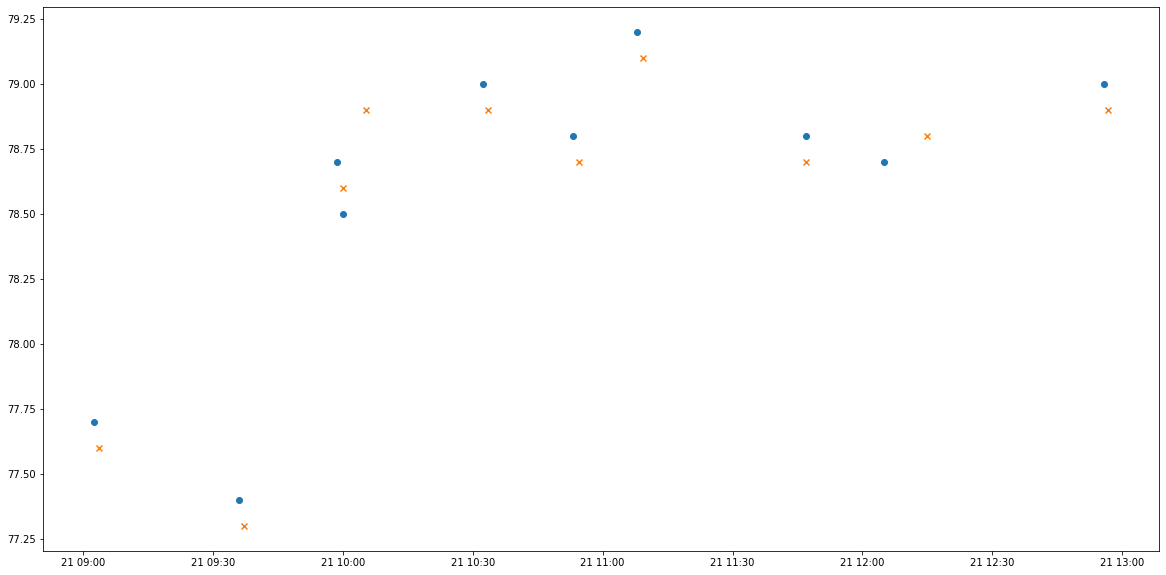

In [58]:
date = "2020-09-21"

sid = "3037"
sid_type = "otc"

lob_path = os.path.join(work_path, date, sid, sid_type + "_lob_" + sid + ".csv")
tick_path = os.path.join(work_path, date, sid, sid_type + "_tick_" + sid + ".csv")

if not os.path.exists(lob_path):
    sid_type = "tse"
    lob_path = os.path.join(work_path, date, sid, sid_type + "_lob_" + sid + ".csv")
    tick_path = os.path.join(work_path, date, sid, sid_type + "_tick_" + sid + ".csv")

temp3 = YY3(lob_path, tick_path, 5, 1000000, 1, 2000000)
temp3.task()
temp3.show_result()

# EOF

In [56]:
os.listdir("/content/gdrive/Shared drives/marketdata/stock/2020-09-21/6278")

['tse_lob_6278.csv', 'tse_tick_6278.csv']